In [1]:
from ThesisFunctions import *

In [2]:
# Required libraries for mathematical operations, data manipulation, and plotting.
import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import sympy.plotting as spp
from sympy import symbols, diff, Poly, solve
from mpl_toolkits.mplot3d import Axes3D

def model_2D(t, A_1, alpha_1, A_2, alpha_2):
    """
    Calculates the sum of two exponentials at given times.
    
    Args:
        t (array-like): The time points for the calculation.
        A_1 (float): Amplitude of the first exponential term.
        alpha_1 (float): Decay rate of the first exponential term.
        A_2 (float): Amplitude of the second exponential term.
        alpha_2 (float): Decay rate of the second exponential term.
    
    Returns:
        np.array: The calculated sum of two exponential functions.
    """
    exp_input1 = float(alpha_1) * np.array(t, dtype=float)
    exp_input2 = float(alpha_2) * np.array(t, dtype=float)
    return A_1 * np.exp(exp_input1) + A_2 * np.exp(exp_input2)


def sse_2D(params, data):
   """
    Computes the sum of squared errors between model predictions and actual data.
    
    Args:
        params (tuple): A tuple of parameters (A_1, alpha_1, A_2, alpha_2) for the model.
        data (pd.DataFrame): DataFrame containing 'Time' and 'Data' columns.
    
    Returns:
        float: The calculated sum of squared errors.
    """
    A_1, alpha_1, A_2, alpha_2 = params
    predictions = model_2d(data['Time'], A_1, alpha_1, A_2, alpha_2)
    return np.sum((data['Data'] - predictions) ** 2)


def data_gen_2D(num_data_points=4, noise_level=0.1, A_1=1, alpha_1=1, A_2=1, alpha_2=1):
    """
    Generates synthetic data based on the sum of two exponentials plus noise.
    
    Args:
        num_data_points (int): Number of data points to generate.
        noise_level (float): Standard deviation of Gaussian noise.
        A_1 (float): Amplitude of the first exponential term.
        alpha_1 (float): Decay rate of the first exponential term.
        A_2 (float): Amplitude of the second exponential term.
        alpha_2 (float): Decay rate of the second exponential term.
    
    Returns:
        pd.DataFrame: DataFrame with columns 'Time' and 'Data' containing the generated data.
    """
    t = np.arange(num_data_points)
    x = A_1 * np.exp(alpha_1 * t) + A_2 * np.exp(alpha_2 * t)
                                                 
    noise = noise_level * x *  np.random.normal(0, 1, size=t.shape) * 0.1
         
    x_noisy = x + noise    

    x_noisy_rational = np.array([min(sp.Rational(int(xn * 100), 100), 10000000) for xn in x_noisy])
    data = pd.DataFrame({'Time': t, 'Data': x_noisy_rational})
    return data

def groeb_2D(x_i, t_i):
     """
    Computes the Groebner basis for the system of equations derived from partial derivatives of SSE.
    
    Args:
        x_i (list): List of data points.
        t_i (list): List of time points corresponding to the data points.
    
    Returns:
        GroebnerBasis: The Groebner basis for the system, which simplifies solving the equations.
    """
    A_1, b_1, A_2, b_2 = sp.symbols('A_1 b_1 A_2 b_2')
    SSE_poly = sum([(x - (A_1 * b_1**t + A_2 * b_2**t))**2 for x, t in zip(x_i, t_i)])
    print(SSE_poly)
    partial_A_1 = sp.diff(SSE_poly, A_1)
    partial_b_1 = sp.diff(SSE_poly, b_1)
    partial_A_2 = sp.diff(SSE_poly, A_2)
    partial_b_2 = sp.diff(SSE_poly, b_2)
    
    B = sp.groebner([partial_A_1, partial_b_1, partial_A_2, partial_b_2], A_1, b_1, A_2, b_2, order='lex')
    
    return B

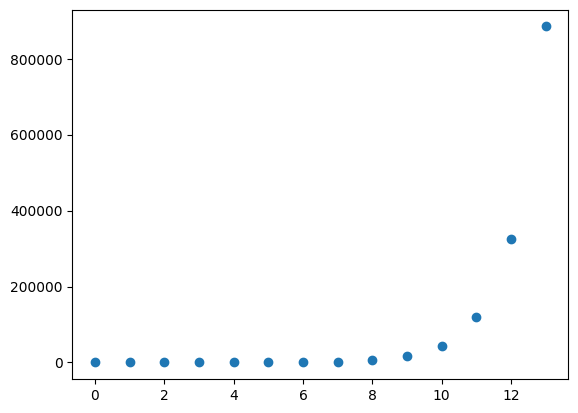

In [25]:
data = data_gen_2D(14, 0, 1, 1, 1, 1)

x_i = np.array(data['Data'].values)
t_i = np.array(data['Time'].values)
plt.scatter(t_i, x_i)

In [26]:
A_1, b_1, A_2, b_2 = sp.symbols('A_1 b_1 A_2 b_2')
SSE_poly = sum([(x - (A_1 * b_1**t + A_2 * b_2**t))**2 for x, t in zip(x_i, t_i)])
print(SSE_poly)

(-A_1 - A_2 + 2)**2 + (-A_1*b_1 - A_2*b_2 + 543/100)**2 + (-A_1*b_1**2 - A_2*b_2**2 + 1477/100)**2 + (-A_1*b_1**3 - A_2*b_2**3 + 4017/100)**2 + (-A_1*b_1**4 - A_2*b_2**4 + 10919/100)**2 + (-A_1*b_1**5 - A_2*b_2**5 + 14841/50)**2 + (-A_1*b_1**6 - A_2*b_2**6 + 16137/20)**2 + (-A_1*b_1**7 - A_2*b_2**7 + 109663/50)**2 + (-A_1*b_1**8 - A_2*b_2**8 + 596191/100)**2 + (-A_1*b_1**9 - A_2*b_2**9 + 405154/25)**2 + (-A_1*b_1**10 - A_2*b_2**10 + 4405293/100)**2 + (-A_1*b_1**11 - A_2*b_2**11 + 2993707/25)**2 + (-A_1*b_1**12 - A_2*b_2**12 + 16275479/50)**2 + (-A_1*b_1**13 - A_2*b_2**13 + 44241339/50)**2


In [27]:
solutions = [[1.9995018213071998, 9.670501221573813e-52, 2.718406429546815, 0.08414083486861897],
            [2.000909509169935, -0.003996760161307073, 2.7180891281188666, 1.5544251754573302],
            [-0.003996760161307073, 2.000909509169935, 1.5544251754573302, 2.7180891281188666],
            [-5.679625008945916e-50, 1.9995018213071998, 0.08414083486861897, 2.718406429546815]]

eval = evaluate_hessian_at_minimas_4x4(solutions, x_i, t_i)

In [28]:
eval

[([1.9995018213071998,
   9.670501221573813e-52,
   2.718406429546815,
   0.08414083486861897],
  False),
 ([2.000909509169935,
   -0.003996760161307073,
   2.7180891281188666,
   1.5544251754573302],
  False),
 ([-0.003996760161307073,
   2.000909509169935,
   1.5544251754573302,
   2.7180891281188666],
  False),
 ([-5.679625008945916e-50,
   1.9995018213071998,
   0.08414083486861897,
   2.718406429546815],
  False)]

In [ ]:
solutions_9 = Solution: [1.9999412387576216, -3.683403866095807e-50, 2.718291518967122, 0.009048866408291877]
Solution: [-4.5800496072139865e-46, 1.9999412387576216, 0.009048866408291877, 2.718291518967122]
Solution: [-0.0031971412701424927, 2.0000125174957404, 1.1836730766667922, 2.7182800658950907]
Solution: [2.0000125174957404, -0.0031971412701424927, 2.7182800658950907, 1.1836730766667922] 

In [ ]:
solutions_8 = Solution: [-0.003283745663122025, 1.9999902330549197, 1.1415272798786824, 2.718284060960978]
Solution: [1.9999902330549197, -0.003283745663122025, 2.718284060960978, 1.1415272798786824]
Solution: [1.9998645646697784, -5.449934291672368e-51, 2.7183071039852056, 0.021154825565212355]
Solution: [3.286329556593869e-34, 1.9998645646697784, 0.021154825565212355, 2.7183071039852056]

In [ ]:
solutions_7 = Solution: [-0.003270868639170967, 2.00010873388842, 1.2544070909848721, 2.718260037405]
Solution: [1.9997492716379965, 2.8548642403301784e-38, 2.7183346609639636, 0.040058952926207626]
Solution: [2.00010873388842, -0.003270868639170967, 2.718260037405, 1.2544070909848721]
Solution: [-6.603706857728832e-36, 1.9997492716379965, 0.040058952926207626, 2.7183346609639636]

In [ ]:
solutions_6 = [2.00010873388842, -0.003270868639170967, 2.718260037405, 1.2544070909848721],
Solution: [1.9997492716379965, 3.3435295249646144e-38, 2.7183346609639636, 0.040058952926207626]
Solution: [-0.003270868639170967, 2.00010873388842, 1.2544070909848721, 2.718260037405]
Solution: [-2.418852062633437e-49, 1.9997492716379965, 0.040058952926207626, 2.7183346609639636]

In [ ]:
solutions_5 = [
                [1.9995018213071998, -9.23983112668591e-52, 2.718406429546815, 0.08414083486861897],
               [1.2366108735154307e-36, 1.9995018213071998, 0.08414083486861897, 2.718406429546815],
               [2.000909509169935, -0.003996760161307073, 2.7180891281188666, 1.5544251754573302],
               [-0.003996760161307073, 2.000909509169935, 1.5544251754573302, 2.7180891281188666]
              ]

In [3]:
solutions_4 = [[1.9990925083061657, -3.6297006103241793e-53, 2.7185573311414557, 0.1723791385773471],
               [-3.5627284780257025e-39, 1.9990925083061657, 0.1723791385773471, 2.7185573311414557]]

In [4]:
data = data_gen_2D(4, 0, 1, 1, 1, 1)

x_i = np.array(data['Data'].values)
t_i = np.array(data['Time'].values)

In [5]:
eval = evaluate_hessian_at_minimas_4x4(solutions_4, x_i, t_i)

Matrix([[2*b_1**6 + 2*b_1**4 + 2*b_1**2 + 2, -2*b_1**3*b_2**3 - 2*b_1**2*b_2**2 - 2*b_1*b_2 - 2, 6*A_1*b_1**5 + 4*A_1*b_1**3 + 4*A_1*b_1 - 2*A_2*b_2 - 6*b_1**2*(-A_1*b_1**3 + A_2*b_2**3 + 4017/100) - 4*b_1*(-A_1*b_1**2 + A_2*b_2**2 + 1477/100) - 543/50, -6*A_2*b_1**3*b_2**2 - 4*A_2*b_1**2*b_2 - 2*A_2*b_1], [-2*b_1**3*b_2**3 - 2*b_1**2*b_2**2 - 2*b_1*b_2 - 2, 2*b_2**6 + 2*b_2**4 + 2*b_2**2 + 2, -6*A_1*b_1**2*b_2**3 - 4*A_1*b_1*b_2**2 - 2*A_1*b_2, -2*A_1*b_1 + 6*A_2*b_2**5 + 4*A_2*b_2**3 + 4*A_2*b_2 + 6*b_2**2*(-A_1*b_1**3 + A_2*b_2**3 + 4017/100) + 4*b_2*(-A_1*b_1**2 + A_2*b_2**2 + 1477/100) + 543/50], [6*A_1*b_1**5 + 4*A_1*b_1**3 + 4*A_1*b_1 - 2*A_2*b_2 - 6*b_1**2*(-A_1*b_1**3 + A_2*b_2**3 + 4017/100) - 4*b_1*(-A_1*b_1**2 + A_2*b_2**2 + 1477/100) - 543/50, -6*A_1*b_1**2*b_2**3 - 4*A_1*b_1*b_2**2 - 2*A_1*b_2, 18*A_1**2*b_1**4 + 8*A_1**2*b_1**2 + 2*A_1**2 - 12*A_1*b_1*(-A_1*b_1**3 + A_2*b_2**3 + 4017/100) - 4*A_1*(-A_1*b_1**2 + A_2*b_2**2 + 1477/100), -18*A_1*A_2*b_1**2*b_2**2 - 8*A_1*A_

In [8]:
A_1, A_2, b_1, b_2 = sp.symbols('A_1 A_2 b_1 b_2')

M = sp.Matrix([[2*b_1**6 + 2*b_1**4 + 2*b_1**2 + 2, -2*b_1**3*b_2**3 - 2*b_1**2*b_2**2 - 2*b_1*b_2 - 2, 6*A_1*b_1**5 + 4*A_1*b_1**3 + 4*A_1*b_1 - 2*A_2*b_2 - 6*b_1**2*(-A_1*b_1**3 + A_2*b_2**3 + 4017/100) - 4*b_1*(-A_1*b_1**2 + A_2*b_2**2 + 1477/100) - 543/50, -6*A_2*b_1**3*b_2**2 - 4*A_2*b_1**2*b_2 - 2*A_2*b_1], [-2*b_1**3*b_2**3 - 2*b_1**2*b_2**2 - 2*b_1*b_2 - 2, 2*b_2**6 + 2*b_2**4 + 2*b_2**2 + 2, -6*A_1*b_1**2*b_2**3 - 4*A_1*b_1*b_2**2 - 2*A_1*b_2, -2*A_1*b_1 + 6*A_2*b_2**5 + 4*A_2*b_2**3 + 4*A_2*b_2 + 6*b_2**2*(-A_1*b_1**3 + A_2*b_2**3 + 4017/100) + 4*b_2*(-A_1*b_1**2 + A_2*b_2**2 + 1477/100) + 543/50], [6*A_1*b_1**5 + 4*A_1*b_1**3 + 4*A_1*b_1 - 2*A_2*b_2 - 6*b_1**2*(-A_1*b_1**3 + A_2*b_2**3 + 4017/100) - 4*b_1*(-A_1*b_1**2 + A_2*b_2**2 + 1477/100) - 543/50, -6*A_1*b_1**2*b_2**3 - 4*A_1*b_1*b_2**2 - 2*A_1*b_2, 18*A_1**2*b_1**4 + 8*A_1**2*b_1**2 + 2*A_1**2 - 12*A_1*b_1*(-A_1*b_1**3 + A_2*b_2**3 + 4017/100) - 4*A_1*(-A_1*b_1**2 + A_2*b_2**2 + 1477/100), -18*A_1*A_2*b_1**2*b_2**2 - 8*A_1*A_2*b_1*b_2 - 2*A_1*A_2], [-6*A_2*b_1**3*b_2**2 - 4*A_2*b_1**2*b_2 - 2*A_2*b_1, -2*A_1*b_1 + 6*A_2*b_2**5 + 4*A_2*b_2**3 + 4*A_2*b_2 + 6*b_2**2*(-A_1*b_1**3 + A_2*b_2**3 + 4017/100) + 4*b_2*(-A_1*b_1**2 + A_2*b_2**2 + 1477/100) + 543/50, -18*A_1*A_2*b_1**2*b_2**2 - 8*A_1*A_2*b_1*b_2 - 2*A_1*A_2, 18*A_2**2*b_2**4 + 8*A_2**2*b_2**2 + 2*A_2**2 + 12*A_2*b_2*(-A_1*b_1**3 + A_2*b_2**3 + 4017/100) + 4*A_2*(-A_1*b_1**2 + A_2*b_2**2 + 1477/100)]])

In [12]:
for row in M:
    print(row)
    print(" ")

print(len(M))

2*b_1**6 + 2*b_1**4 + 2*b_1**2 + 2
 
-2*b_1**3*b_2**3 - 2*b_1**2*b_2**2 - 2*b_1*b_2 - 2
 
6*A_1*b_1**5 + 4*A_1*b_1**3 + 4*A_1*b_1 - 2*A_2*b_2 - 6*b_1**2*(-A_1*b_1**3 + A_2*b_2**3 + 40.17) - 4*b_1*(-A_1*b_1**2 + A_2*b_2**2 + 14.77) - 10.86
 
-6*A_2*b_1**3*b_2**2 - 4*A_2*b_1**2*b_2 - 2*A_2*b_1
 
-2*b_1**3*b_2**3 - 2*b_1**2*b_2**2 - 2*b_1*b_2 - 2
 
2*b_2**6 + 2*b_2**4 + 2*b_2**2 + 2
 
-6*A_1*b_1**2*b_2**3 - 4*A_1*b_1*b_2**2 - 2*A_1*b_2
 
-2*A_1*b_1 + 6*A_2*b_2**5 + 4*A_2*b_2**3 + 4*A_2*b_2 + 6*b_2**2*(-A_1*b_1**3 + A_2*b_2**3 + 40.17) + 4*b_2*(-A_1*b_1**2 + A_2*b_2**2 + 14.77) + 10.86
 
6*A_1*b_1**5 + 4*A_1*b_1**3 + 4*A_1*b_1 - 2*A_2*b_2 - 6*b_1**2*(-A_1*b_1**3 + A_2*b_2**3 + 40.17) - 4*b_1*(-A_1*b_1**2 + A_2*b_2**2 + 14.77) - 10.86
 
-6*A_1*b_1**2*b_2**3 - 4*A_1*b_1*b_2**2 - 2*A_1*b_2
 
18*A_1**2*b_1**4 + 8*A_1**2*b_1**2 + 2*A_1**2 - 12*A_1*b_1*(-A_1*b_1**3 + A_2*b_2**3 + 40.17) - 4*A_1*(-A_1*b_1**2 + A_2*b_2**2 + 14.77)
 
-18*A_1*A_2*b_1**2*b_2**2 - 8*A_1*A_2*b_1*b_2 - 2*A_1*A_2
 
-6*A_

In [37]:
eval

[([1.9990925083061657,
   -3.6297006103241793e-53,
   2.7185573311414557,
   0.1723791385773471],
  False),
 ([-3.5627284780257025e-39,
   1.9990925083061657,
   0.1723791385773471,
   2.7185573311414557],
  False)]